In [2]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb
import pyagrum.causal as csl 
import pyagrum.causal.notebook as cslnb
from typing import Generator

In [3]:
class ClusterNode:
    def __init__(self, id: gum.InfluenceDiagram, index : int, decisionSet: set[int], interfaceVars: set[int] = None):
        self.id = id
        self.index = index
        self.decisionSet = decisionSet  # all variables in this cluster
        self.nodeSet = set()    # !!! TO BE INITIALISED WITH NODE ONCE RELO AND RELH WORK
        self.interfaceVars = interfaceVars  # shared with neighbours, initialised at clustering
        self.incomingMessages = []  # from children
        self.outgoingMessage = None  # to parent after computing self
        self.children = []  # TREE STRUCTURE
        self.parent = None
        self.value = None  # V^C (from paper)

    def pullMessages(self) -> list[float]:
        '''
        collect messages from children
        '''
        return [child.outgoingMessage for child in self.children]

    def pushMessage(self) -> None:
        '''
        push message to parent
        '''
        self.outgoing_message = self.value

    def isLeaf(self) -> bool:
        return len(self.children) == 0
    
    def toID(self) -> gum.InfluenceDiagram:
        '''
        Description: 
        Converts submodel into its own standalone influence diagram.

        Returns: 
        res : gum.InfluenceDiagram
        '''
        res = gum.InfluenceDiagram()
        for n in self.nodeSet:
            res.add(gum.LabelizedVariable(str(i)))
        for src, dst in id.arcs():  # copy arcs over
            if src in self.nodeSet and dst in self.nodeSet:
                res.addArc(str(src), str(dst))
        # DOESNT HANDLE INTERFACE VARS YET
        return res

    def solve(self):
        ''' 
        dfs through the dag, get to leaves
        turn leaf into gum.InfluenceDiagram
        make interface variables into auxiliary utility nodes
        SHAFER SHENOY IT
        if V^C independant from everything or you are root, add it to final MEU
        else push LMEU to parent
        '''
        pass


In [8]:
d = gum.randomBN(n=4, names=['0', '1', '2', '3'])
d

(pyagrum.BayesNet@00000151FE3A36B0) BN{nodes: 4, arcs: 3, domainSize: 16, dim: 7, mem: 112o}

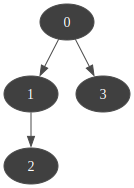

In [9]:
gnb.showBN(d)